In [1]:
import pandas as pd
import numpy as np
import os

# Station Linking Data

In [2]:
station_link=pd.read_excel('D:\station_linking.xlsx')

In [3]:
station_link.head()

,station_id_obj,station_name,lt,lo,station_sname_for,Unnamed: 5
0,42026,GULMARG,34.050000,74.400000,GLM,NaN
1,42027,SRINAGAR (42027-0),34.083333,74.833333,SRN,NaN
2,42042,SRINAGAR (42042-0),33.983333,74.783333,SRN,NaN
3,42044,QAZI GUND,33.583333,75.083333,QZD,NaN
4,42045,BANIHAL,33.500000,75.166667,BNL,NaN


In [4]:
station_link=station_link.drop('Unnamed: 5',axis=1)

In [5]:
station_link.shape

(413, 5)

In [6]:
station_link.head()

,station_id_obj,station_name,lt,lo,station_sname_for
0,42026,GULMARG,34.050000,74.400000,GLM
1,42027,SRINAGAR (42027-0),34.083333,74.833333,SRN
2,42042,SRINAGAR (42042-0),33.983333,74.783333,SRN
3,42044,QAZI GUND,33.583333,75.083333,QZD
4,42045,BANIHAL,33.500000,75.166667,BNL


In [7]:
station_link.isnull().sum()    ### 39 stations does not have the short name

station_id_obj        0
station_name          0
lt                    0
lo                    0
station_sname_for    39
dtype: int64

In [8]:
station_link=station_link.drop(['lt','lo'],axis=1)

In [9]:
station_link

,station_id_obj,station_name,station_sname_for
0,42026,GULMARG,GLM
1,42027,SRINAGAR (42027-0),SRN
2,42042,SRINAGAR (42042-0),SRN
3,42044,QAZI GUND,QZD
4,42045,BANIHAL,BNL
...,...,...,...
408,43373,TRIVANDRUM MET.OBS./THUMBA,NaN
409,43376,PALAYANKOTTAI,NaN
410,43377,KANNIYAKUMARI,KYK
411,43379,TUTICORIN NEW PORT,TTC


In [10]:
station_link.dropna(how='any',axis=0,inplace=True)

In [11]:
station_link.shape

(374, 3)

In [12]:
station_link

,station_id_obj,station_name,station_sname_for
0,42026,GULMARG,GLM
1,42027,SRINAGAR (42027-0),SRN
2,42042,SRINAGAR (42042-0),SRN
3,42044,QAZI GUND,QZD
4,42045,BANIHAL,BNL
...,...,...,...
406,43371,THIRUVANANTHAPURAM (43371-0),TRV
407,43372,THIRUVANANTHAPURAM (43372-0),N_THIRUVANANTHAPURAM-AP
410,43377,KANNIYAKUMARI,KYK
411,43379,TUTICORIN NEW PORT,TTC


In [13]:
station_link.reset_index(drop=True,inplace=True)

In [14]:
station_link


,station_id_obj,station_name,station_sname_for
0,42026,GULMARG,GLM
1,42027,SRINAGAR (42027-0),SRN
2,42042,SRINAGAR (42042-0),SRN
3,42044,QAZI GUND,QZD
4,42045,BANIHAL,BNL
...,...,...,...
369,43371,THIRUVANANTHAPURAM (43371-0),TRV
370,43372,THIRUVANANTHAPURAM (43372-0),N_THIRUVANANTHAPURAM-AP
371,43377,KANNIYAKUMARI,KYK
372,43379,TUTICORIN NEW PORT,TTC


In [15]:
station_link.isnull().sum()

station_id_obj       0
station_name         0
station_sname_for    0
dtype: int64

In [16]:
station_link[station_link.duplicated(subset = 'station_sname_for')]

,station_id_obj,station_name,station_sname_for
2,42042,SRINAGAR (42042-0),SRN
200,42799,JAMSHEDPUR,JSD
266,43064,PUNE/LOHOGAON AERODROME,PNE
267,43067,PASHAN-CTI,PNE
285,43150,VISHAKHAPATNAM/WALTAIR,VSK
302,43198,BELGAUM/SAMBRE,BLG


In [17]:
station_link[station_link.duplicated(subset = 'station_sname_for', keep = 'first')]

,station_id_obj,station_name,station_sname_for
2,42042,SRINAGAR (42042-0),SRN
200,42799,JAMSHEDPUR,JSD
266,43064,PUNE/LOHOGAON AERODROME,PNE
267,43067,PASHAN-CTI,PNE
285,43150,VISHAKHAPATNAM/WALTAIR,VSK
302,43198,BELGAUM/SAMBRE,BLG


In [18]:
station_link.head()

,station_id_obj,station_name,station_sname_for
0,42026,GULMARG,GLM
1,42027,SRINAGAR (42027-0),SRN
2,42042,SRINAGAR (42042-0),SRN
3,42044,QAZI GUND,QZD
4,42045,BANIHAL,BNL


# Obj Data 

In [19]:
folder_path="D:\OBSERVATIONS"
main_folder=os.listdir(folder_path)

In [20]:
print(main_folder)

['SynopJun23', 'SynopMay23']


In [21]:
master_df_obj=pd.DataFrame()

for folder in main_folder:
    print(folder)
    cwd=folder_path + '\\' + folder
    sub_folder_list=os.listdir(cwd)
    for sub_file in sub_folder_list:
        print(sub_file)
        sub_cwd=cwd+ '\\'+ sub_file
        excel_file_list=os.listdir(sub_cwd)
#         print(len(excel_file_list))
        for excel_file in excel_file_list:
            hours=excel_file.split('.')[2]
            if hours not in ['19H','20H','23H']:
                excel_file_path=sub_cwd +'\\'+excel_file
                print(excel_file_path)
                data=pd.read_csv(excel_file_path,delimiter=';',usecols=['Station_id',' Date of Observation',' Dry Bulb Temperature'])
                data['hour']=hours
                print(data.shape)
                master_df_obj=pd.concat([master_df_obj,data],ignore_index=True)
            

SynopJun23
20230530
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.2023053000000.0H.csv
(169, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.20230530120000.12H.csv
(361, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.20230530150000.15H.csv
(143, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.20230530180000.18H.csv
(135, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.20230530210000.21H.csv
(111, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.2023053030000.3H.csv
(377, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.2023053060000.6H.csv
(214, 4)
D:\OBSERVATIONS\SynopJun23\20230530\SYNOP_DATA.2023053090000.9H.csv
(208, 4)
20230531
D:\OBSERVATIONS\SynopJun23\20230531\SYNOP_DATA.2023053100000.0H.csv
(164, 4)
D:\OBSERVATIONS\SynopJun23\20230531\SYNOP_DATA.20230531120000.12H.csv
(344, 4)
D:\OBSERVATIONS\SynopJun23\20230531\SYNOP_DATA.20230531150000.15H.csv
(143, 4)
D:\OBSERVATIONS\SynopJun23\20230531\SYNOP_DATA.20230531180000.18H.csv
(129, 4)
D:\OBSERVATIONS\SynopJun23\202305

D:\OBSERVATIONS\SynopMay23\20230503\SYNOP_DATA.20230503210000.21H.csv
(107, 4)
D:\OBSERVATIONS\SynopMay23\20230503\SYNOP_DATA.2023050330000.3H.csv
(364, 4)
D:\OBSERVATIONS\SynopMay23\20230503\SYNOP_DATA.2023050360000.6H.csv
(209, 4)
D:\OBSERVATIONS\SynopMay23\20230503\SYNOP_DATA.2023050390000.9H.csv
(205, 4)
20230504
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.2023050400000.0H.csv
(160, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.20230504120000.12H.csv
(341, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.20230504150000.15H.csv
(140, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.20230504180000.18H.csv
(130, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.20230504210000.21H.csv
(95, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.2023050430000.3H.csv
(321, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.2023050460000.6H.csv
(199, 4)
D:\OBSERVATIONS\SynopMay23\20230504\SYNOP_DATA.2023050490000.9H.csv
(209, 4)
20230505
D:\OBSERVATIONS\SynopMay23\20230505\SYNOP_DATA.20

(166, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.20230518120000.12H.csv
(386, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.20230518150000.15H.csv
(149, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.20230518180000.18H.csv
(135, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.20230518210000.21H.csv
(105, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.2023051830000.3H.csv
(382, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.2023051860000.6H.csv
(219, 4)
D:\OBSERVATIONS\SynopMay23\20230518\SYNOP_DATA.2023051890000.9H.csv
(240, 4)
20230519
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_DATA.2023051900000.0H.csv
(170, 4)
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_DATA.20230519120000.12H.csv
(350, 4)
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_DATA.20230519150000.15H.csv
(152, 4)
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_DATA.20230519180000.18H.csv
(141, 4)
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_DATA.20230519210000.21H.csv
(115, 4)
D:\OBSERVATIONS\SynopMay23\20230519\SYNOP_

In [22]:
master_df_obj.shape

(65630, 4)

In [23]:
master_df_obj.tail(5)

,Station_id,Date of Observation,Dry Bulb Temperature,hour
65625,43533,20230529,30.0,9H
65626,43555,20230529,32.2,9H
65627,43577,20230529,32.5,9H
65628,43588,20230529,31.4,9H
65629,43599,20230529,31.4,9H


In [24]:
master_df_obj.duplicated().sum()

1597

In [25]:
master_df_obj=master_df_obj.drop_duplicates()

In [26]:
master_df_obj.shape

(64033, 4)

In [27]:
master_df_obj.columns

Index(['Station_id', ' Date of Observation', ' Dry Bulb Temperature', 'hour'], dtype='object')

In [28]:
master_df_obj=master_df_obj.drop_duplicates(subset=['Station_id', ' Date of Observation', 'hour'])

In [29]:
master_df_obj.shape

(63986, 4)

In [30]:
# count_of_station_obj=master_df_obj['Station_id'].value_counts().to_frame().reset_index()

In [31]:
# count_of_station_obj.shape

In [32]:
# count_of_station_obj.head()

In [33]:
master_df_obj.columns

Index(['Station_id', ' Date of Observation', ' Dry Bulb Temperature', 'hour'], dtype='object')

In [34]:
count_of_station_obj=master_df_obj[['Station_id', ' Date of Observation']].value_counts().to_frame().reset_index()

In [35]:
count_of_station_obj.rename({0:'Count'},axis='columns',inplace=True)

In [36]:
count_of_station_obj.sort_values(by=['Station_id', ' Date of Observation','Count'],ascending=[True,True,False] ,inplace=True)

In [37]:
count_of_station_obj[['Station_id', ' Date of Observation','Count']].tail(5)

,Station_id,Date of Observation,Count
5962,43599,20230605,5
2444,43599,20230606,8
2443,43599,20230607,8
5960,43599,20230608,5
5070,43599,20230609,6


In [38]:
# count_of_station_obj[count_of_station_obj['Station_id']==42027]

# List of Station id , with 8 records

In [39]:
list_8=count_of_station_obj[count_of_station_obj['Count']>=8]['Station_id'].unique()

In [40]:
print(len(list_8))

137


In [41]:
print(list_8)

[42027 42056 42071 42079 42101 42103 42105 42111 42123 42131 42165 42170
 42181 42182 42189 42273 42328 42339 42343 42348 42361 42369 42377 42379
 42410 42415 42435 42452 42463 42474 42479 42492 42498 42503 42539 42559
 42571 42587 42591 42631 42634 42647 42667 42671 42675 42693 42701 42706
 42724 42730 42731 42737 42748 42754 42779 42798 42806 42807 42809 42811
 42830 42840 42867 42874 42886 42895 42901 42909 42921 42933 42971 42973
 43003 43014 43041 43049 43053 43063 43081 43086 43105 43110 43117 43128
 43147 43149 43150 43176 43181 43185 43187 43189 43201 43213 43220 43221
 43237 43243 43245 43279 43284 43295 43296 43311 43314 43321 43329 43331
 43333 43344 43346 43347 43348 43361 43363 43369 43371 43377 43413 43418
 43421 43424 43436 43441 43444 43450 43466 43467 43473 43486 43495 43497
 43533 43555 43577 43588 43599]


In [42]:
# master_df_obj[(master_df_obj['Station_id']==42071) & (master_df_obj[' Date of Observation']==20230524)]

# Check Station_id in station_link table

In [43]:
station_link.head()

,station_id_obj,station_name,station_sname_for
0,42026,GULMARG,GLM
1,42027,SRINAGAR (42027-0),SRN
2,42042,SRINAGAR (42042-0),SRN
3,42044,QAZI GUND,QZD
4,42045,BANIHAL,BNL


In [44]:
list_8_name=[]
for station_id in list_8:
    if station_id in station_link['station_id_obj'].values:
        temp_name=station_link[station_link['station_id_obj']==station_id]['station_sname_for'].values[0]
        list_8_name.append(temp_name)

In [45]:
pd.DataFrame(list_8_name).value_counts(ascending=False)

VSK    2
ABP    1
NLA    1
PDC    1
PBN    1
      ..
DTG    1
DSA    1
DMD    1
DGH    1
VVL    1
Length: 113, dtype: int64

In [46]:
print(len(list_8_name))

114


In [47]:
print(list_8_name)

['SRN', 'JMU', 'AMR', 'PTL', 'AMB', 'CHD', 'DDN', 'GGN', 'HSR', 'BKN', 'CRU', 'PLM', 'SFD', 'BRL', 'BRC', 'JSM', 'JDP', 'AJM', 'JPR', 'GWL', 'USI', 'GRK', 'GHT', 'TZP', 'BRM', 'KTA', 'JHS', 'PRAYAGRAJ', 'VNS', 'PTN', 'BGP', 'MLD', 'DSA', 'GNA', 'STN', 'DTG', 'GYA', 'NLA', 'BHJ', 'AHM', 'BHP', 'SGR', 'JBP', 'ABP', 'RNC', 'BNK', 'AGT', 'OKH', 'DWK', 'RJK', 'BRD', 'IND', 'PND', 'JSD', 'ALP', 'KOL', 'DMD', 'PBD', 'SRT', 'SON', 'RPR', 'JRG', 'BLS', 'DGH', 'VVL', 'NAS ', 'AKL', 'BBS', 'CBL', 'SCZ', 'AGD', 'JGD', 'GPL', 'PRI', 'PNE', 'NZB', 'RMD', 'KLN', 'RTN', 'SLP', 'HYD', 'TNI', 'VSK', 'VSK', 'VJW', 'MPT', 'NSP', 'KND', 'GDG', 'KRN', 'BPT', 'ONG', 'ANT', 'KVL', 'NLR', 'MDS', 'MNG', 'BNG', 'N_BENGALURU-HAL', 'AMN', 'KZK', 'CBT', 'CDL', 'PDC', 'PBL', 'TRP', 'KRL', 'NPT', 'ARP', 'TND', 'PBN', 'MNC', 'TRV', 'KYK']


In [49]:
North_region  = ['JMU', 'AMR', 'PTL', 'AMB', 'CHD', 'DDN', 'GGN', 'HSR', 'BKN', 'CRU', 'PLM','SFD', 'BRL', 'BRC', 'JSM',
                 'JDP', 'AJM', 'JPR', 'GWL', 'USI', 'GRK', 'GHT', 'TZP', 'BRM', 'KTA', 'JHS', 'PRAYAGRAJ', 'VNS']

east_north_east = ['PTN', 'BGP', 'MLD','DTG','GYA','NLA', 'BHJ', 'AHM', 'BHP', 'SGR','JBP', 'ABP','RNC', 'BNK',
'AGT','JSD', 'ALP', 'KOL', 'DMD','BBS','JGD', 'GPL', 'PRI']


west_region = ['DSA','OKH', 'DWK', 'RJK', 'BRD', 'IND', 'PND','CBL', 'SCZ', 'AGD', 'PNE']

central_region = ['GNA','STN','PBD','SRT','SON','RPR','JRG','BLS','DGH','VVL','NAS','AKL']

south_region = ['NZB','RMD', 'KLN', 'RTN', 'SLP', 'HYD', 'TNI', 'VSK', 'VSK', 'VJW', 'MPT', 'NSP', 'KND', 'GDG',
'KRN', 'BPT', 'ONG', 'ANT', 'KVL', 'NLR', 'MDS', 'MNG', 'BNG', 'AMN', 'KZK', 'CBT', 'CDL', 'PDC', 'PBL', 'TRP',
                'KRL', 'NPT', 'ARP', 'TND', 'PBN', 'MNC', 'TRV', 'KYK']

# step 4- model prep.

In [50]:
import datetime

In [51]:
master_df_for=pd.DataFrame()
folder_path="D:\WRF"
main_folder=os.listdir(folder_path)
main_folder=os.listdir(folder_path)

for folder in main_folder:
    t1=datetime.datetime.now()
    print(folder, end=' :- ')
    cwd=folder_path + '\\' + folder
    sub_folder=os.listdir(cwd)
    for file in sub_folder:
        station_name_temp=file.split('.')[0]
#         print(station_name_temp)
        if station_name_temp in list_8_name: 
            file_path=cwd + '\\' + file
            df=pd.read_csv(file_path,delimiter='\s+',skiprows=0,nrows=7)
            df=df.drop(0)
            df.drop(columns=['Td','RH','WD(10m)','WS(10m)','Rain','T2Tend'],inplace=True)
            df['sub_station']=file[:-4]
            master_df_for=pd.concat([master_df_for,df],ignore_index=True)
    print(datetime.datetime.now()-t1, end='   |||   ')
print(datetime.datetime.now()-t1)

2023050100 :- 0:00:02.383642   |||   2023050106 :- 0:00:02.395247   |||   2023050112 :- 0:00:01.303328   |||   2023050118 :- 0:00:01.552318   |||   2023050200 :- 0:00:01.949810   |||   2023050206 :- 0:00:01.316331   |||   2023050212 :- 0:00:01.694449   |||   2023050218 :- 0:00:01.573986   |||   2023050300 :- 0:00:01.819007   |||   2023050306 :- 0:00:01.778191   |||   2023050312 :- 0:00:01.994366   |||   2023050318 :- 0:00:01.920926   |||   2023050400 :- 0:00:01.755288   |||   2023050406 :- 0:00:01.650374   |||   2023050412 :- 0:00:02.716199   |||   2023050418 :- 0:00:01.492821   |||   2023050500 :- 0:00:01.485734   |||   2023050506 :- 0:00:01.227005   |||   2023050512 :- 0:00:01.505491   |||   2023050518 :- 0:00:01.375895   |||   2023050600 :- 0:00:01.663166   |||   2023050606 :- 0:00:01.262251   |||   2023050612 :- 0:00:01.658380   |||   2023050618 :- 0:00:01.414326   |||   2023050700 :- 0:00:01.772685   |||   2023050706 :- 0:00:01.804913   |||   2023050712 :- 0:00:01.610598   |||   2

In [52]:
master_df_for.shape

(107520, 3)

In [53]:
master_df_for.sort_values(by=['sub_station','Forecast/Hour'],inplace=True)

In [54]:
master_df_for['sub_station'].nunique()

112

In [55]:
master_df_for.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107520 entries, 0 to 107519
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Forecast/Hour  107520 non-null  object
 1   TT             107520 non-null  object
 2   sub_station    107520 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [56]:
master_df_for_try = master_df_for.copy()

In [59]:
region_mapping = {}
for sub_station in North_region:
    region_mapping[sub_station] = 'North'
for sub_station in east_north_east:
    region_mapping[sub_station] = 'East North East'
for sub_station in west_region:
    region_mapping[sub_station] = 'West'
for sub_station in central_region:
    region_mapping[sub_station] = 'Central'
for sub_station in south_region:
    region_mapping[sub_station] = 'South'


In [60]:
master_df_for_try['Region'] = master_df_for_try['sub_station'].map(region_mapping)
master_df_for_try

,Forecast/Hour,TT,sub_station,Region
0,2023-05-01_00,20.2,ABP,East North East
1,2023-05-01_01,20.7,ABP,East North East
2,2023-05-01_02,21.9,ABP,East North East
3,2023-05-01_03,23.3,ABP,East North East
4,2023-05-01_04,25.0,ABP,East North East
...,...,...,...,...
107515,2023-06-09_19,29.0,VVL,Central
107516,2023-06-09_20,29.0,VVL,Central
107517,2023-06-09_21,29.0,VVL,Central
107518,2023-06-09_22,29.0,VVL,Central


In [78]:
file_path = r'C:\Users\HP\Desktop\IMD.csv'
master_df_for_try.to_csv(file_path, index=False)

In [74]:
cd

C:\Users\HP


In [68]:
master_df_for_try.loc[master_df_for_try['Region']=='nan']

,Forecast/Hour,TT,sub_station,Region


In [69]:
master_df_for_try['Region'].unique()

array(['East North East', 'West', 'North', 'Central', 'South', nan],
      dtype=object)

In [ ]:
master_df_for_try.Region

In [65]:
from sklearn.cluster import KMeans

# Separate the data for each region
regions = master_df_for_try['Region'].unique()

regions

array(['East North East', 'West', 'North', 'Central', 'South', nan],
      dtype=object)

In [58]:
import pandas as pd


region_mapping = {}
for sub_station in North_region:
    region_mapping[sub_station] = 'North'
for sub_station in east_north_east:
    region_mapping[sub_station] = 'East North East'
for sub_station in west_region:
    region_mapping[sub_station] = 'West'
for sub_station in central_region:
    region_mapping[sub_station] = 'Central'
for sub_station in south_region:
    region_mapping[sub_station] = 'South'

# Assuming your original dataset is named "df", you can add a new column "Region" based on the sub_station
master_df_for_try['Region'] = master_df_for_try['sub_station'].map(region_mapping)


from sklearn.cluster import KMeans

# Separate the data for each region
regions = master_df_for_try['Region'].unique()
clustered_data = {}

for region in regions:
    region_data = master_df_for_try[master_df_for_try['Region'] == region][['TT']]
    kmeans = KMeans(n_clusters=5, random_state=42)
    region_data['Cluster'] = kmeans.fit_predict(region_data)
    clustered_data[region] = region_data


# Example: To access the clustered data for the North region:
north_clustered_data = clustered_data['North']
print(north_clustered_data.head())


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [57]:
master_df_for_try.head(10)

,Forecast/Hour,TT,sub_station
0,2023-05-01_00,20.2,ABP
1,2023-05-01_01,20.7,ABP
2,2023-05-01_02,21.9,ABP
3,2023-05-01_03,23.3,ABP
4,2023-05-01_04,25.0,ABP
5,2023-05-01_05,25.8,ABP
672,2023-05-01_06,27.9,ABP
673,2023-05-01_07,29.4,ABP
674,2023-05-01_08,30.3,ABP
675,2023-05-01_09,30.0,ABP


In [61]:
master_df_for_try['Forecast/Hour']=master_df_for_try['Forecast/Hour'].str.replace('_',' ')

In [62]:
# master_df_for_try[['Date', 'Hour']] = master_df_for_try['Forecast/Hour'].str.split('_', expand=True)

In [63]:
master_df_for_try.head()

,Forecast/Hour,TT,sub_station
0,2023-05-01 00,20.2,ABP
1,2023-05-01 01,20.7,ABP
2,2023-05-01 02,21.9,ABP
3,2023-05-01 03,23.3,ABP
4,2023-05-01 04,25.0,ABP


In [64]:
master_df_for_try['Forecast/Hour']=master_df_for_try['Forecast/Hour']+ ':00:00'

In [65]:
master_df_for_try

,Forecast/Hour,TT,sub_station
0,2023-05-01 00:00:00,20.2,ABP
1,2023-05-01 01:00:00,20.7,ABP
2,2023-05-01 02:00:00,21.9,ABP
3,2023-05-01 03:00:00,23.3,ABP
4,2023-05-01 04:00:00,25.0,ABP
...,...,...,...
107515,2023-06-09 19:00:00,29.0,VVL
107516,2023-06-09 20:00:00,29.0,VVL
107517,2023-06-09 21:00:00,29.0,VVL
107518,2023-06-09 22:00:00,29.0,VVL


In [ ]:
# Apply K-means clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [66]:
# master_df_for_try['Date'] = pd.to_datetime(master_df_for_try['Date'])

In [67]:
# master_df_for_try['TT']=pd.to_numeric(master_df_for_try['TT'])

In [68]:
master_df_for_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107520 entries, 0 to 107519
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Forecast/Hour  107520 non-null  object
 1   TT             107520 non-null  object
 2   sub_station    107520 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [69]:
master_df_for_try.head()

,Forecast/Hour,TT,sub_station
0,2023-05-01 00:00:00,20.2,ABP
1,2023-05-01 01:00:00,20.7,ABP
2,2023-05-01 02:00:00,21.9,ABP
3,2023-05-01 03:00:00,23.3,ABP
4,2023-05-01 04:00:00,25.0,ABP


# Build model

In [70]:
# !pip install prophet


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [72]:
# Convert 'Hour' column to numeric (int) type
# master_df_for_try['Hour'] = master_df_for_try['Hour'].astype(int)



In [73]:
master_df_for_try['sub_station'].unique()

array(['ABP', 'AGD', 'AGT', 'AHM', 'AJM', 'AKL', 'ALP', 'AMB', 'AMN',
       'AMR', 'ANT', 'ARP', 'BBS', 'BGP', 'BHJ', 'BHP', 'BKN', 'BLS',
       'BNG', 'BNK', 'BPT', 'BRC', 'BRD', 'BRL', 'BRM', 'CBL', 'CBT',
       'CDL', 'CHD', 'CRU', 'DDN', 'DGH', 'DMD', 'DSA', 'DTG', 'DWK',
       'GDG', 'GGN', 'GHT', 'GNA', 'GPL', 'GRK', 'GWL', 'GYA', 'HSR',
       'HYD', 'IND', 'JBP', 'JDP', 'JGD', 'JHS', 'JMU', 'JPR', 'JRG',
       'JSD', 'JSM', 'KLN', 'KND', 'KOL', 'KRL', 'KRN', 'KTA', 'KVL',
       'KYK', 'KZK', 'MDS', 'MLD', 'MNC', 'MNG', 'MPT', 'NLA', 'NLR',
       'NPT', 'NSP', 'NZB', 'N_BENGALURU-HAL', 'OKH', 'ONG', 'PBD', 'PBL',
       'PBN', 'PDC', 'PLM', 'PND', 'PNE', 'PRAYAGRAJ', 'PRI', 'PTL',
       'PTN', 'RJK', 'RMD', 'RNC', 'RPR', 'RTN', 'SCZ', 'SFD', 'SGR',
       'SLP', 'SON', 'SRN', 'SRT', 'STN', 'TND', 'TNI', 'TRP', 'TRV',
       'TZP', 'USI', 'VJW', 'VNS', 'VSK', 'VVL'], dtype=object)

In [74]:
master_df_for_try.head()

,Forecast/Hour,TT,sub_station
0,2023-05-01 00:00:00,20.2,ABP
1,2023-05-01 01:00:00,20.7,ABP
2,2023-05-01 02:00:00,21.9,ABP
3,2023-05-01 03:00:00,23.3,ABP
4,2023-05-01 04:00:00,25.0,ABP


In [75]:
master_df_for_try_DDN=master_df_for_try[master_df_for_try['sub_station']=='DDN']

In [76]:
# Convert 'Date' and 'Hour' columns to datetime objects
# master_df_for_try['Datetime'] = str(master_df_for_try['Date']) + ' ' + str(master_df_for_try['Hour']) + ':00:00'


In [77]:
master_df_for_try_DDN.rename({'Forecast/Hour':'Datetime'},axis='columns',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3160593369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_for_try_DDN.rename({'Forecast/Hour':'Datetime'},axis='columns',inplace=True)


In [78]:
master_df_for_try.tail()

,Forecast/Hour,TT,sub_station
107515,2023-06-09 19:00:00,29.0,VVL
107516,2023-06-09 20:00:00,29.0,VVL
107517,2023-06-09 21:00:00,29.0,VVL
107518,2023-06-09 22:00:00,29.0,VVL
107519,2023-06-09 23:00:00,28.9,VVL


In [79]:




# Prepare the data for Prophet
data = master_df_for_try_DDN[['Datetime', 'TT']]
data = data.rename(columns={'Datetime': 'ds', 'TT': 'y'})


In [101]:

# Create and fit the Prophet model
model = Prophet()
model.fit(data)

# Make future predictions for the next 3 days in 3-hour intervals
future_dates = pd.date_range(start=data['ds'].iloc[0], periods=24*5, freq='3H')
future = pd.DataFrame({'ds': future_dates})



13:36:42 - cmdstanpy - INFO - Chain [1] start processing
13:36:42 - cmdstanpy - INFO - Chain [1] done processing


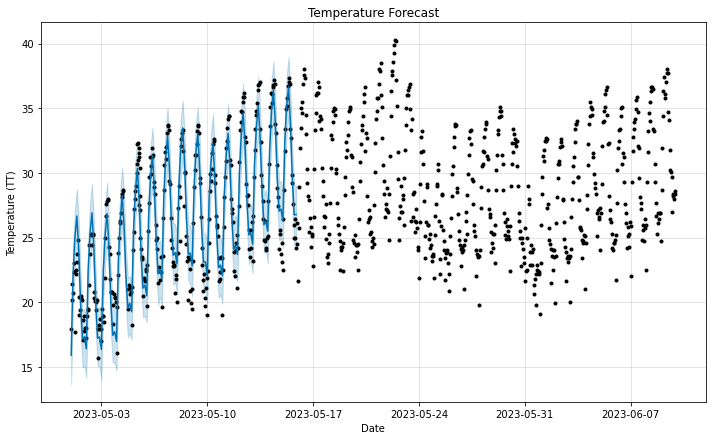

In [102]:
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Temperature (TT)')
plt.title('Temperature Forecast')
plt.show()


In [108]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
100,2023-05-13 12:00:00,29.492372,30.346484,34.890069,29.492372,29.492372,3.205609,3.205609,3.205609,3.013719,3.013719,3.013719,0.191890,0.191890,0.191890,0.0,0.0,0.0,32.697981
101,2023-05-13 15:00:00,29.539253,26.399714,30.945752,29.539253,29.539253,-0.979267,-0.979267,-0.979267,-1.269978,-1.269978,-1.269978,0.290711,0.290711,0.290711,0.0,0.0,0.0,28.559986
102,2023-05-13 18:00:00,29.586133,23.818564,28.258415,29.586133,29.586133,-3.602314,-3.602314,-3.602314,-4.010096,-4.010096,-4.010096,0.407782,0.407782,0.407782,0.0,0.0,0.0,25.983820
103,2023-05-13 21:00:00,29.618153,24.070389,28.679546,29.618153,29.618153,-3.349463,-3.349463,-3.349463,-3.887627,-3.887627,-3.887627,0.538164,0.538164,0.538164,0.0,0.0,0.0,26.268689
104,2023-05-14 00:00:00,29.642741,23.007482,27.827313,29.642741,29.642741,-4.153525,-4.153525,-4.153525,-4.829000,-4.829000,-4.829000,0.675475,0.675475,0.675475,0.0,0.0,0.0,25.489216
105,2023-05-14 03:00:00,29.667330,29.594458,33.924045,29.667330,29.667330,2.059712,2.059712,2.059712,1.247200,1.247200,1.247200,0.812511,0.812511,0.812511,0.0,0.0,0.0,31.727041
106,2023-05-14 06:00:00,29.691918,32.497765,37.112120,29.691918,29.691918,5.031437,5.031437,5.031437,4.089528,4.089528,4.089528,0.941909,0.941909,0.941909,0.0,0.0,0.0,34.723355
107,2023-05-14 09:00:00,29.716507,34.199202,38.603810,29.716507,29.716507,6.703050,6.703050,6.703050,5.646255,5.646255,5.646255,1.056795,1.056795,1.056795,0.0,0.0,0.0,36.419557
108,2023-05-14 12:00:00,29.741095,31.670155,36.127204,29.741095,29.741095,4.165071,4.165071,4.165071,3.013719,3.013719,3.013719,1.151352,1.151352,1.151352,0.0,0.0,0.0,33.906166
109,2023-05-14 15:00:00,29.765684,27.441390,31.993805,29.765684,29.765684,-0.048736,-0.048736,-0.048736,-1.269978,-1.269978,-1.269978,1.221242,1.221242,1.221242,0.0,0.0,0.0,29.716948


In [396]:
#include sub station

In [428]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from prophet import Prophet

# # # Assuming 'master_df_for_try' is your DataFrame with 'TT', 'sub_station', 'Date', and 'Hour' columns

# # # Convert 'Hour' column to numeric (int) type
# # master_df_for_try['Hour'] = master_df_for_try['Hour'].astype(int)

# # # Convert 'Date' and 'Hour' columns to datetime objects
# # master_df_for_try['Datetime'] = pd.to_datetime(master_df_for_try['Date'] + ' ' + master_df_for_try['Hour'].astype(str) + ':00:00')

# # Prepare the data for Prophet
# data = master_df_for_try[['Datetime', 'sub_station', 'TT']]
# data = data.rename(columns={'Datetime': 'ds', 'sub_station': 'sub_station', 'TT': 'y'})

# # Create separate forecasts for each sub-station
# sub_stations = data['sub_station'].unique()
# forecast_data = {}

# for sub_station in sub_stations:
#     sub_data = data[data['sub_station'] == sub_station]
    
#     # Create and fit the Prophet model for each sub-station
#     model = Prophet()
#     model.fit(sub_data)
    
#     # Make future dataframe with 1000 points for the next 10 days (in 3-hour intervals)
#     future_dates = model.make_future_dataframe(periods=10, freq='3H')
    
#     # Generate the forecast for the future dataframe
#     forecast = model.predict(future_dates)
#     forecast_data[sub_station] = forecast



In [427]:

# # Visualize the forecasts for each sub-stati
# for sub_station, forecast in forecast_data.items():
#     plt.figure()
#     plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
#     plt.scatter(data[data['sub_station'] == sub_station]['ds'], data[data['sub_station'] == sub_station]['y'], color='red', label='Actual')
#     plt.xlabel('Date')
#     plt.ylabel('Temperature (TT)')
#     plt.title(f'Temperature Forecast for Sub-station {sub_station}')
#     plt.rcParams['figure.figsize'] = [15,20]
#     plt.legend()
#     plt.show()

# LSTM model.........

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [94]:

# Assuming 'master_df_for_try' is your DataFrame with 'TT', 'sub_station', 'Date', and 'Hour' columns

# Convert 'Hour' column to numeric (int) type
#master_df_for_try['Hour'] = master_df_for_try['Hour'].astype(int)

# Convert 'Date' and 'Hour' columns to datetime objects
#master_df_for_try['Datetime'] = pd.to_datetime(master_df_for_try['Date'] + ' ' + master_df_for_try['Hour'].astype(str) + ':00:00')

# Create a pivot table to make each sub-station's weather data a separate time series
#data = master_df_for_try.pivot_table(index='Datetime', columns='sub_station', values='TT', aggfunc='mean').reset_index()

# Normalize the data
scaler = MinMaxScaler()
data[data.columns[1:]] = scaler.fit_transform(data[data.columns[1:]])

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Create input sequences and target values for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10  # Set the sequence length
X_train, y_train = create_sequences(train.values, seq_length)
X_test, y_test = create_sequences(test.values, seq_length)


KeyError: 'Date'

In [ ]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, len(data.columns)-1)))
model.add(Dense(len(data.columns)-1))
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Visualize the forecasts for each sub-station
for i in range(len(data.columns)-1):
    plt.figure()
    plt.plot(test.index[seq_length:], y_pred[:, i], label='Forecast')
    plt.plot(test.index[seq_length:], y_test[:, i], color='red', label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Temperature (TT)')
    plt.title(f'Temperature Forecast for Sub-station {data.columns[i+1]}')
    plt.legend()
    plt.show()


In [431]:
!pip install --upgrade numpy


  Using cached numpy-1.25.1-cp39-cp39-win_amd64.whl (15.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.1 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.25.1 which is incompatible.


In [432]:
!pip uninstall scipy
!pip install scipy


^C
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
